### TAsk

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

In [1]:
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from summarytools import dfSummary

In [3]:
data= pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [4]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Region[object],1. Andhra Pradesh2. Assam3. Uttarakhand4. Uttar Pradesh5. Tripura6. Telangana7. Tamil Nadu8. Rajasthan9. Punjab10. Puducherry11. other,10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)10 (3.7%)167 (62.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADhUlEQVR4nO3cQWoaYQCG4d8iodkoIngYD9HD9hDeRsRZNCEbuyiFIiYreS3O8+wSN0N4GZnh/7K4XC4DCt8efQHMh9jIiI2M2MiIjYzYyIiNjNjIiI3MYozxOsZ4ufHZx+VyeYuvhye23G63P1ar1eb6g2maTovF4qfguJflarXa7Pf7t/V6/f73l+fz+fvhcNgcj8eXMYbYuIvlGGOs1+v33W736+qz1wdcD0/MAwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZFZjvHn/Nq/v7z+Ge5hOU3T6XA4bMbV+bVpmk5jjI/HXBbPyAaBzMK/zKLizkbGuoqMdRUZ6yoyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZNzZyBi8kDF4IWPwQsZLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IWMBwQyvkbJWFeRsa4iY11FxgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZBwLJ2NdRcadjYzBCxmDFzIGL2S81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMY+FkDF7IuLORMXghY/BCxuCFjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjHUVGRsEMtZVZNzZyFhXkbGuImNdRcZLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IWMOxsZgxcyBi9kDF7IeKlLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kPGAQMbXKBnrKjLWVWSsq8h4QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGuoqMY+FkrKvIuLORMXghY/BCxuCFjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBC5mv7mx0ZvEt8unghc5cxkU3By905jQu+mrwQmcW4yIvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MjcHLzQmdPf/tPBC525jIscC/8/zOJYuMELGQ8IZMRGRmxkxEZGbGTERkZsZMRGRmxkfgOZa07iCH7QpAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Date[object],1. 31-03-20202. 31-05-20203. 30-06-20204. 31-07-20205. 31-08-20206. 30-09-20207. 31-10-20208. 31-01-20209. 29-02-202010. 30-04-2020,27 (10.1%)27 (10.1%)27 (10.1%)27 (10.1%)27 (10.1%)27 (10.1%)27 (10.1%)26 (9.7%)26 (9.7%)26 (9.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADPElEQVR4nO3cQYoaUQBF0W+QJj2xEMHFuIgsNotwNyLWIN30xAwyT9pSbsA+Z67U4FJSxX+urtfrgMK3/30BfB1iIyM2MmIjIzYyYiMjNjJiIyM2MqsxxusY4+WO7/i4Xq9vD7oenth6t9v92Gw226VfMM/zebVa/RQc/7LebDbbw+HwNk3T+60fvlwu34/H4/Z0Or2MMcTGX63HGGOapvf9fv9r4Xe8PvB6eGIeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Misx/hzVGjJh5d+jq9pPc/z+Xg8bsfCo0LzPJ/HGB+PvSyekWPhZFb+xYiKOxsZgxcyBi9kDF7IeKlLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kHFnI2PwQsbghYzBCxkvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjI2CGSsq8i4s5GxriJjXUXGuoqMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGXc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeCHjAYGMn1Ey1lVkrKvIWFeR8YBARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjHUVGcfCyVhXkXFnI2PwQsbghYzBCxkvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWDgZgxcyHhDI3Psz6ieUT7trXWVZxS0Wr6ssq7jVvesqyyo+zQMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmcXrKssqbnXXusqyils4Fk7GuoqMOxsZgxcyBi9kDF7IeKlLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kHFnI2PwQsbghYzBCxkvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjI2CGSsq8h4QCAjNjJiIyM2MmIjIzYyYiPzGwWIGXP7hDdBAAAAAElFTkSuQmCC"">",0(0.0%)
3,Frequency[object],1. M,267 (100.0%),,0(0.0%)
4,Estimated Unemployment Rate (%)[float64],Mean (sd) : 12.2 (10.8)min < med < max:0.5 < 9.7 < 75.8IQR (CV) : 11.9 (1.1),252 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACeElEQVR4nO3cPa8SQRiG4XfgQJaP7PKh0NFY0FlQ0ljZ+mNt7en5ARS2BDhAWA9CEBsxJpoDzATkmdxXzcxS3IHMwrvueDwa8OgK//sNAJd4OvcC51zFzMqe+++Ox+OL51rgt1dDdc5V2u32pzRNmz6br9frZ+fcZ2JFqHOfqOU0TZvD4fAly7LtNRuvVqtkNBo15/N52cwIFUHOfvWbmWVZtu10Ot889q94rAH+wmEKEggVEggVEgg

In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


#EDA

<Axes: xlabel='count', ylabel='Region.1'>

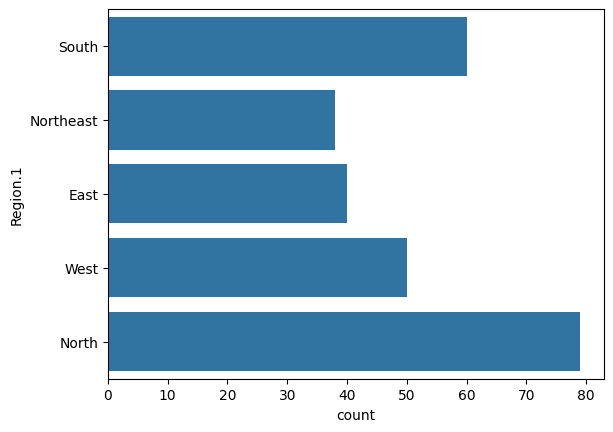

In [7]:
sns.countplot(data['Region.1'])

Insight

---

*   Majority of peoples are from North, and minority are from Northeast.



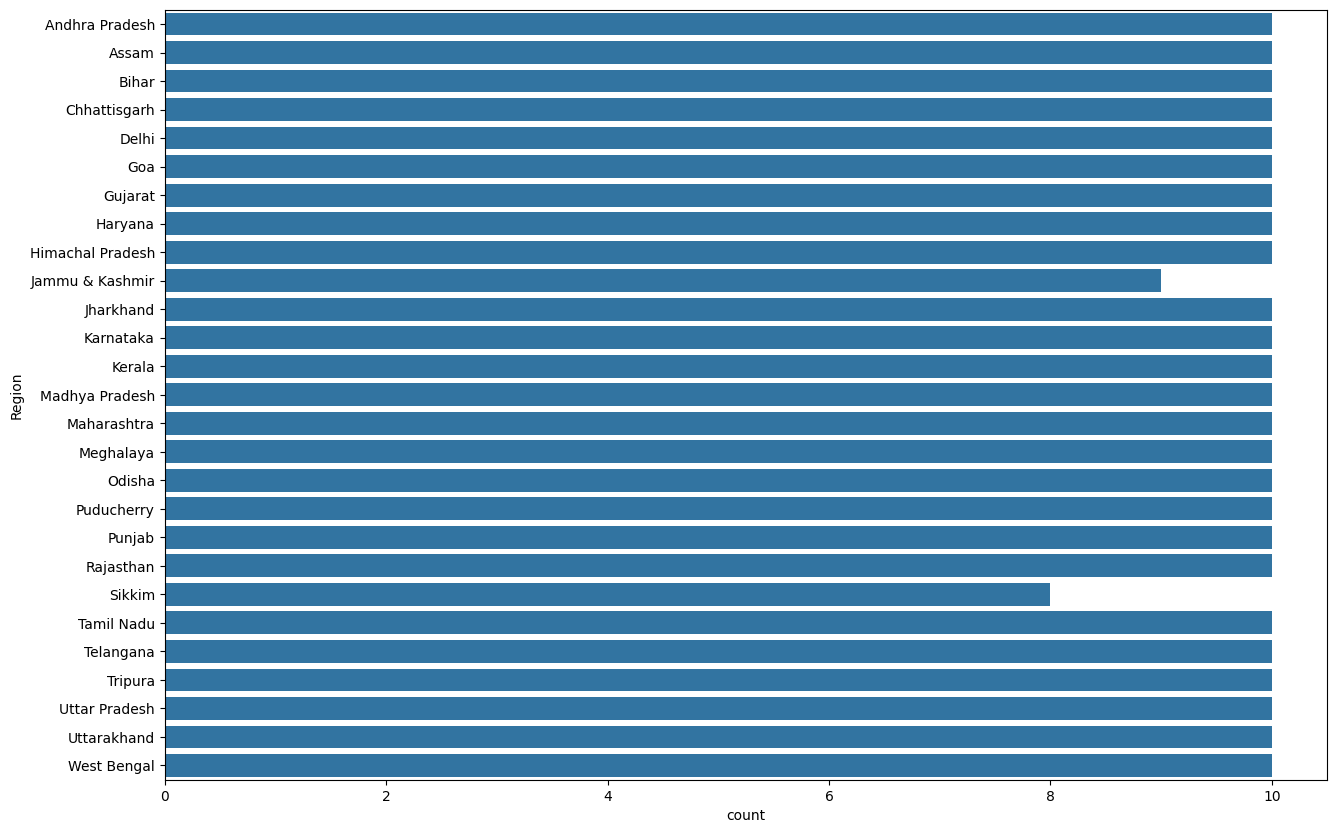

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(y=data["Region"])
plt.show()

<Axes: xlabel='Region.1', ylabel=' Estimated Unemployment Rate (%)'>

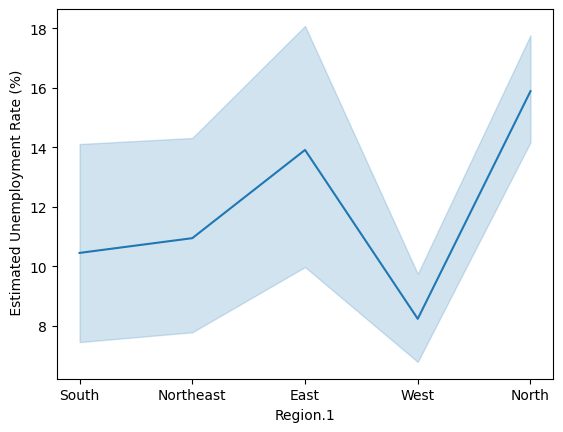

In [9]:
# LinePlot diagram
sns.lineplot(y=data[' Estimated Unemployment Rate (%)'],x=data['Region.1'])

Insight

---

* According to the data the estimate of unemployed rate is higher in North region and lowest in West region.

<Axes: xlabel='Region.1', ylabel=' Estimated Labour Participation Rate (%)'>

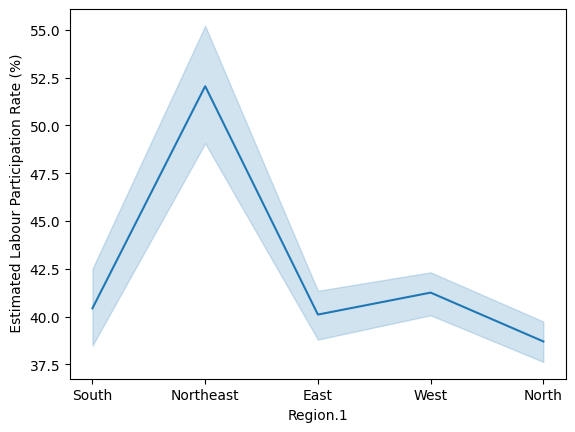

In [10]:
sns.lineplot(y=data[' Estimated Labour Participation Rate (%)'],x=data['Region.1'])

Insight

---

* According to the data, the estimated labor Participate rate is higher for Northeast region and lowest for north region.

<Axes: xlabel='Region.1', ylabel=' Estimated Employed'>

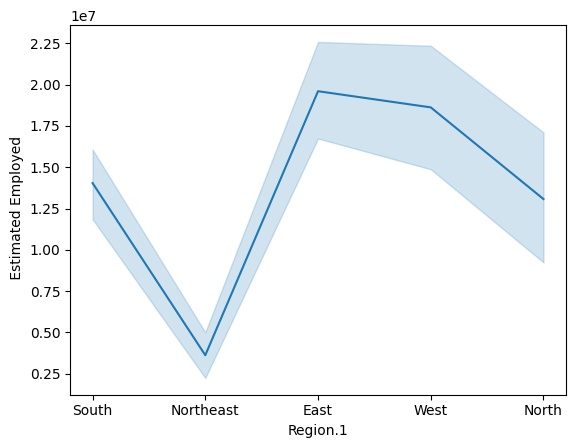

In [11]:
sns.lineplot(y=data[' Estimated Employed'],x=data['Region.1'])

Insight

---

* In the data West and east region have highest employed and in Northeast employed person are very low.

## Avg,High,Lowest unemployment rate

In [14]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [15]:
data.rename(columns={' Date':'Date',' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Unemployment Rate',' Estimated Employed': 'Estimated Employed',' Estimated Labour Participation Rate (%)':'Labour Participation Rate'},inplace=True)

In [35]:
avg_unemployment_rate=data.groupby('Region')['Unemployment Rate'].mean()
state_with_highest_unemployment=avg_unemployment_rate.max()
Highest_unemployment_rate=avg_unemployment_rate.idxmax()
print(f"state  with  high employment : {Highest_unemployment_rate}\nhigh employment rate :{state_with_highest_unemployment}")

state  with  high employment : Haryana
high employment rate :27.476999999999997


In [36]:
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
lowest_unemployment=avg_unemployment_rate.min()
print(f"state  with  low employment :{state_with_lowest_unemployment}\nlow employment rate :{lowest_unemployment}")

state  with  low employment :Meghalaya
low employment rate :3.8659999999999997


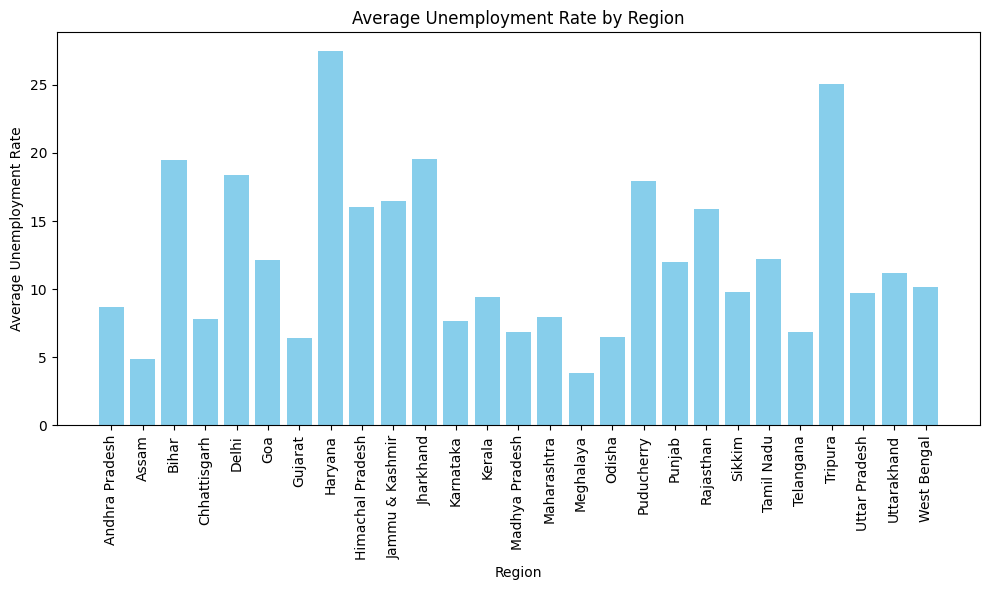

In [37]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insight

---


The highest unemployed rate is in Hariyana and Lowest in Megalaya

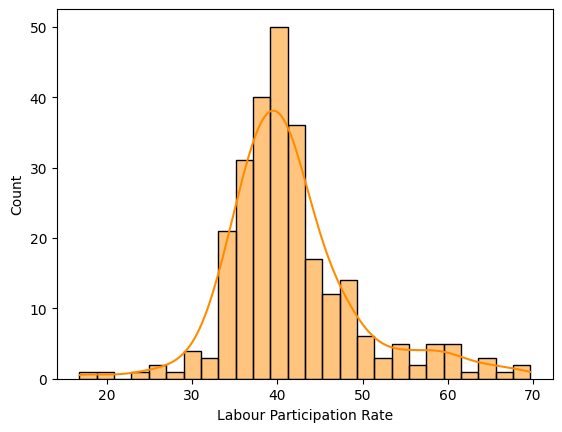

In [43]:
sns.histplot(data, x="Labour Participation Rate", kde=True,color="darkorange")
plt.show()

## Unemployment Rate vs. Labor Participation Rate

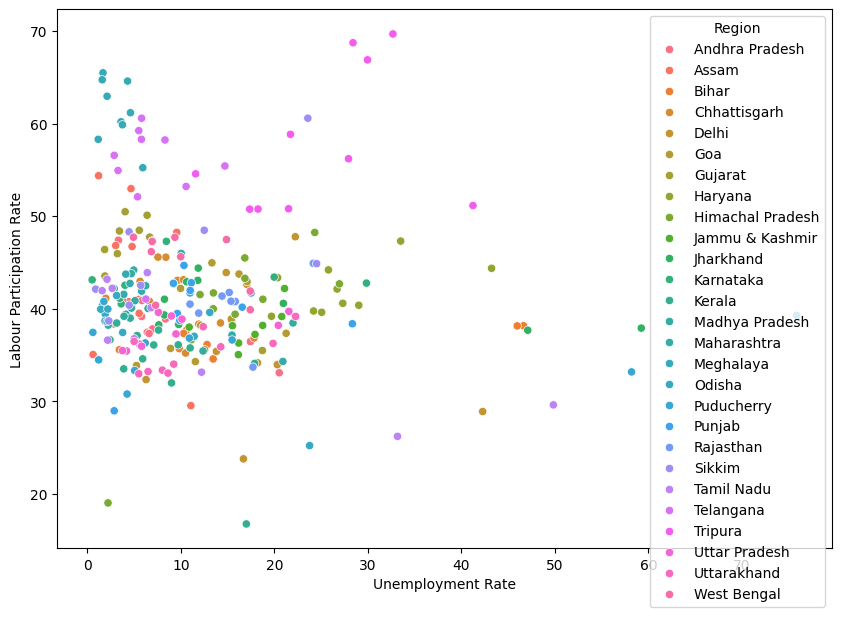

In [45]:
plt.figure(figsize=(10,7))
sns.scatterplot(data, x="Unemployment Rate", y="Labour Participation Rate", hue="Region")
plt.show()

## Time Series Line Plot by Region

In [48]:
import plotly.express as px
fig = px.line(data, x='Date', y="Unemployment Rate", color='Region.1',title='Unemployment Rate Over Time')
fig.show()

In [51]:
fig = px.bar(data, x="Region", y="Labour Participation Rate", title="labour_rate 2020",
             animation_frame='Date',template='plotly',color="Region.1")
fig.show()

In [57]:
fig = px.bar(data, x="Region", y="Unemployment Rate", title="unemployee rate 2020",
             animation_frame='Date',color="Region")
fig.show()

In [56]:
fig = px.bar(data, x="Region", y="Labour Participation Rate", title="labour_rate 2020",
             animation_frame='Date',color="Region.1")
fig.show()

In [49]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Unemployment Rate',
       'Estimated Employed', 'Labour Participation Rate', 'Region.1',
       'longitude', 'latitude'],
      dtype='object')